# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
onebedroom = pd.read_csv('data/City_MedianRentalPrice_1Bedroom.csv')
fourbedroom = pd.read_csv('data/City_MedianRentalPrice_4Bedroom.csv')
# onebedroom['bedrooms'] = 1
# fourbedroom['bedrooms'] = 4

In [3]:
onebedroom.shape

(818, 125)

In [4]:
fourbedroom.shape

(316, 125)

In [5]:
#find unique values of city, I believe this is why onebedroom has 500+ rows
onebedroom.RegionName.nunique()

773

In [6]:
fourbedroom.RegionName.nunique()

309

In [7]:
# All Rentals DF:
rentals = pd.concat([onebedroom, fourbedroom])

In [22]:
rentals.head(30)


,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,2369.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5
5,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,6,NaN,NaN,NaN,NaN,NaN,...,1550.0,1525.0,1496.0,1500.0,1507.5,1554.0,1495.0,1500.0,1500.0,1470.0
6,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7,NaN,NaN,NaN,NaN,NaN,...,1055.0,1115.5,1172.5,1161.0,1129.0,1102.5,1122.0,1100.0,1110.0,1170.0
7,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,8,NaN,NaN,NaN,NaN,NaN,...,1002.5,1010.0,1008.0,1026.0,1010.0,1040.0,1029.5,1030.0,1025.0,1028.0
8,San Diego,CA,San Diego-Carlsbad,San Diego County,9,NaN,NaN,NaN,NaN,NaN,...,1995.0,1990.0,2000.0,2050.0,2100.0,2100.0,2100.0,2049.5,1995.0,2000.0
9,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,10,NaN,NaN,NaN,NaN,NaN,...,1376.0,1375.0,1375.0,1360.0,1355.0,1330.0,1335.0,1340.0,1330.0,1340.0


In [9]:
rentals.drop('Unnamed: 0', inplace=True, axis=1)
rentals.head()

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,2369.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0
1,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,NaN,NaN,NaN,NaN,NaN,...,2360.0,2395.0,2370.0,2395.0,2395.0,2400.0,2425.0,2350.0,2330.0,2340.0
2,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,3,NaN,NaN,NaN,NaN,NaN,...,1265.0,1270.0,1269.0,1286.0,1275.0,1275.0,1270.0,1264.0,1245.0,1249.0
3,Chicago,IL,Chicago-Naperville-Elgin,Cook County,4,NaN,NaN,NaN,NaN,NaN,...,1695.0,1650.0,1650.0,1634.0,1600.0,1582.0,1595.0,1542.0,1550.0,1550.0
4,San Antonio,TX,San Antonio-New Braunfels,Bexar County,5,NaN,NaN,NaN,NaN,NaN,...,985.0,981.0,985.0,999.0,1000.0,1000.0,991.0,985.0,974.5,967.5


In [10]:
rentals.dtypes

RegionName     object
State          object
Metro          object
CountyName     object
SizeRank        int64
               ...   
2019-08       float64
2019-09       float64
2019-10       float64
2019-11       float64
2019-12       float64
Length: 124, dtype: object

In [11]:
# Will need to convert dates to date obj (will do in smaller df's) not in column names

rentals.head(1)

,RegionName,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,2010-06,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,New York,NY,New York-Newark-Jersey City,Queens County,1,NaN,NaN,NaN,2250.0,2369.0,...,2350.0,2400.0,2400.0,2450.0,2450.0,2475.0,2475.0,2400.0,2400.0,2425.0


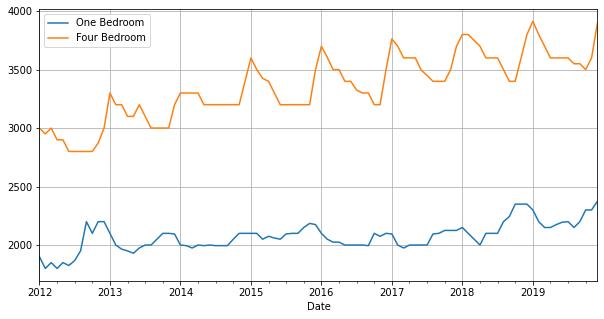

In [12]:
def get_city_data(city_name):
    city_data = rentals [rentals['RegionName'] == city_name]
    city_data = city_data.drop(city_data.columns[[0, 1, 2, 3, 4, 5]], axis=1)

    dates = []
    rental_prices1 = []
    rental_prices2 = []

    for col in city_data:
        dates.append(col)

    city_df = pd.DataFrame(dates, columns = ['Date'])

    # ONE BEDROOM PRICES
    for price in city_data.iloc[0]:
        rental_prices1.append(price)

    # FOUR BEDROOM PRICES
    for price in city_data.iloc[1]:
        rental_prices2.append(price)

    city_df['One Bedroom'] = rental_prices1
    city_df['Four Bedroom'] = rental_prices2
    
    # DROP BEDROOM VAL
#     city_df.drop(city_df.tail(1).index, inplace=True)

    #################

    # CLEAN DATA
    city_df = city_df.dropna()


    ##################

    # CONVERT DATES TO DATETIME
    city_df.Date = city_df.Date.apply(pd.to_datetime, errors='coerce')


    ###################
    return city_df

    ##########

boston = get_city_data('Boston')

##################
# Plot Function


def get_city_line(data_frame):
    data_frame.plot(kind='line', x="Date", y=["One Bedroom", "Four Bedroom"], figsize=(10,5), grid=True)
    
get_city_line(boston)

In [13]:
### THOUGHTS:

### September prices are highest - when majority of leases renew / college students return

## Summer rental prices look low for 4 bedrooms - while there's a possible increase in 1 bedrooms?

## Are end of year rentals high because of low inventory?/no one moving during winter?



In [14]:
san_diego = get_city_data('San Diego')
san_diego.shape

(105, 3)

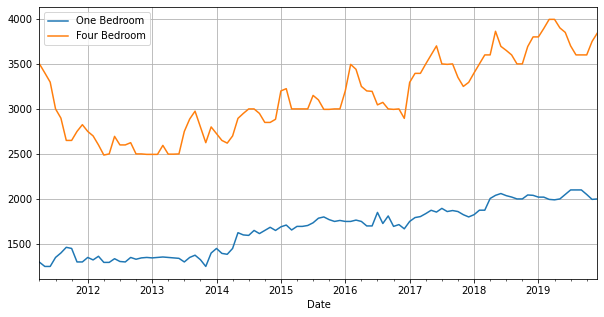

In [15]:
get_city_line(san_diego)

In [16]:
new_york = get_city_data('New York')
new_york.shape

(65, 3)

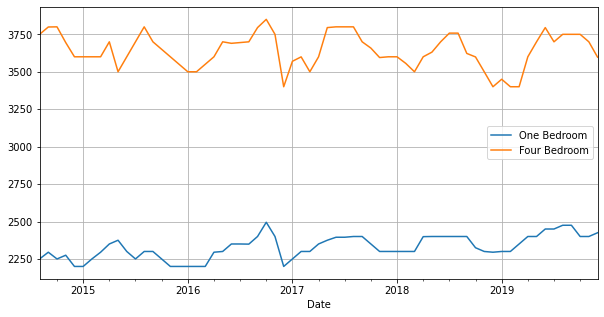

In [17]:
get_city_line(new_york)

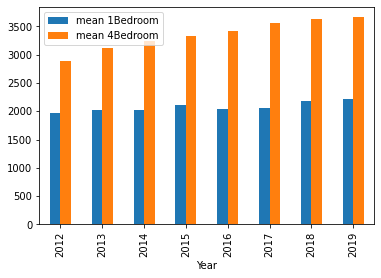

In [18]:
boston.head()

def get_city_yearly_avgs(city_df):
    city_group_by_year = city_df
    city_group_by_year['Year'] = city_df.Date.dt.year
    city1_group_by_year = city_group_by_year.groupby('Year')['One Bedroom']
    city2_group_by_year = city_group_by_year.groupby('Year')['Four Bedroom']

    city1 = city1_group_by_year.agg(['mean']).round(2)
    city2 = city2_group_by_year.agg(['mean']).round(2)

    city1.head()
    city2.head()


    yearly_mean = pd.merge(city1, city2, how='right', left_index=True, right_index=True, suffixes=(' 1Bedroom', ' 4Bedroom'))
    yearly_mean.plot( y=['mean 1Bedroom', 'mean 4Bedroom'], kind='bar')

get_city_yearly_avgs(boston)


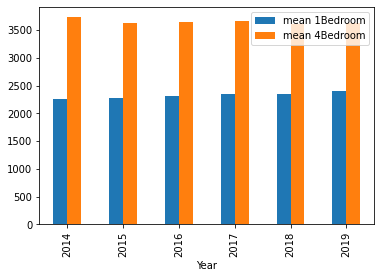

In [19]:
get_city_yearly_avgs(new_york)


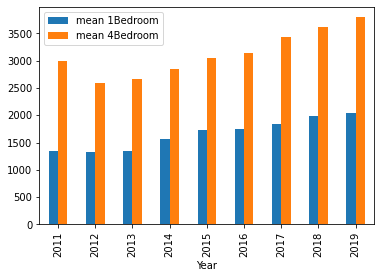

In [20]:
get_city_yearly_avgs(san_diego)




In [21]:
san_fran = get_city_data('San Francisco').head()

san_fran

# get_city_line(san_fran)

,Date,One Bedroom,Four Bedroom
64,2015-07-01,3495.0,7600.0
65,2015-08-01,3552.5,7200.0
66,2015-09-01,3507.0,6995.0
67,2015-10-01,3500.0,6350.0
68,2015-11-01,3495.0,6200.0
